In [1]:
#Import the necessary dependecies
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, TimeDistributed, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Data importation
df = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


**DATA-PREPROCESSING**

In [2]:
#Data feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [3]:
#Checking for the sum of Missing values per feature
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
#Remove the "id" feature
df = df.drop("id", axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


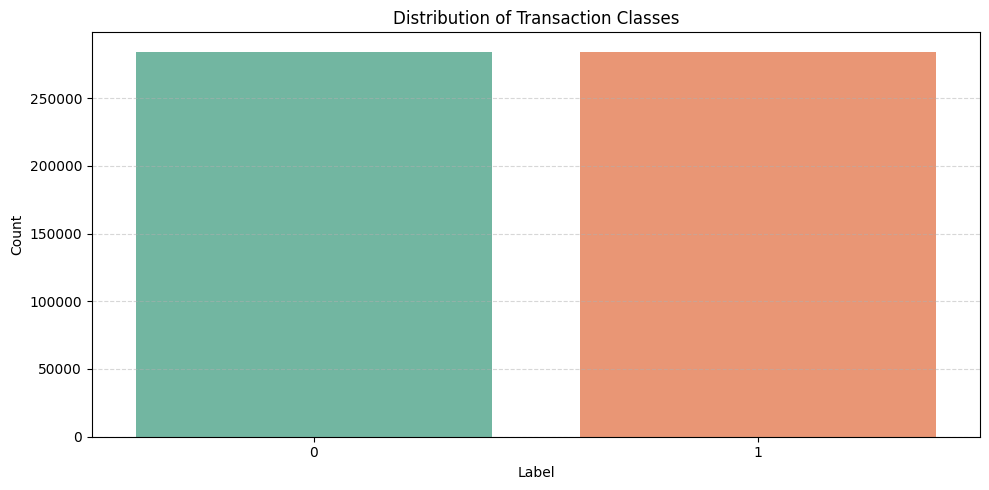

In [5]:
# Count the labels
counts = df['Class'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=counts.index, y=counts.values, palette='Set2')
plt.title('Distribution of Transaction Classes')
plt.xlabel('Label')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

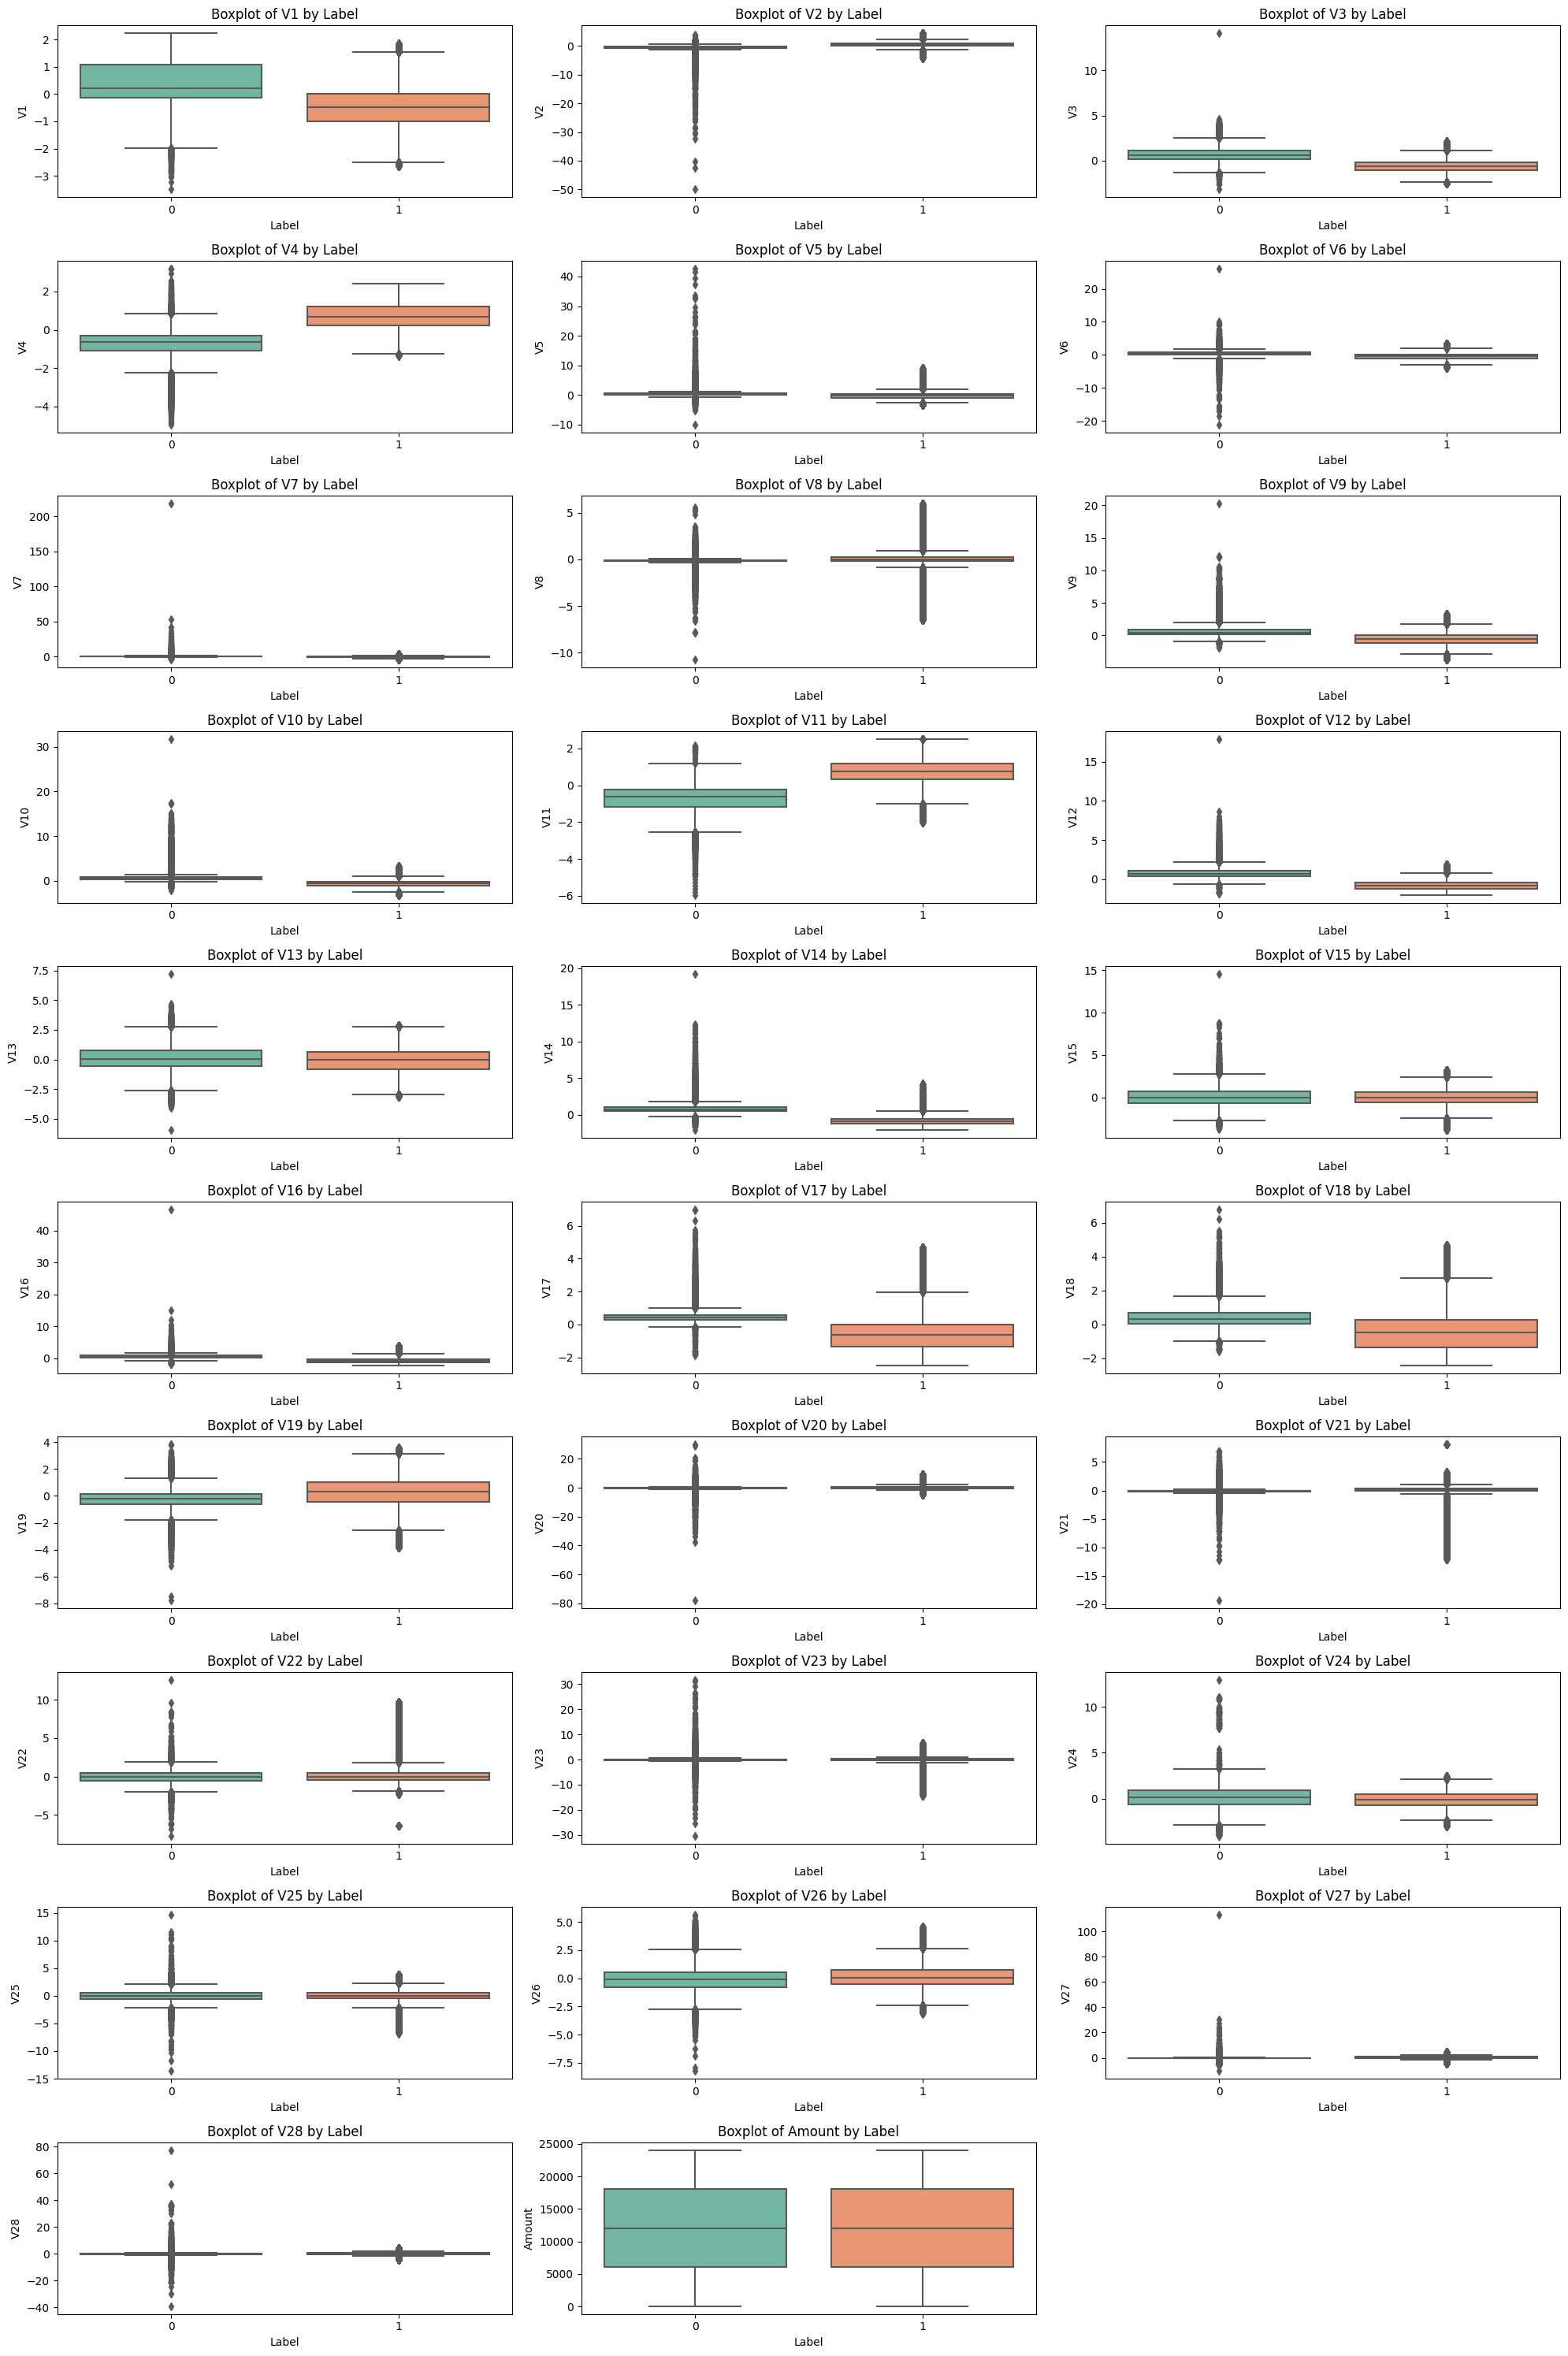

In [6]:
#Boxplot Grouped by Label
features = df.iloc[:, 0:29] 
plt.figure(figsize=(20, 30))
for idx, col in enumerate(features):
    plt.subplot(10, 3, idx + 1)
    sns.boxplot(data=df, x='Class', y=col, palette='Set2')
    plt.title(f'Boxplot of {col} by Label', fontsize=12)
    plt.xlabel('Label')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [7]:
#Remove of possible outliers to optimize the training process
df_filtered = df.copy()
for col in features:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

# Check the new shape after removing outliers
print("Original shape:", df.shape)
print("Filtered shape:", df_filtered.shape)

Original shape: (568630, 30)
Filtered shape: (245934, 30)


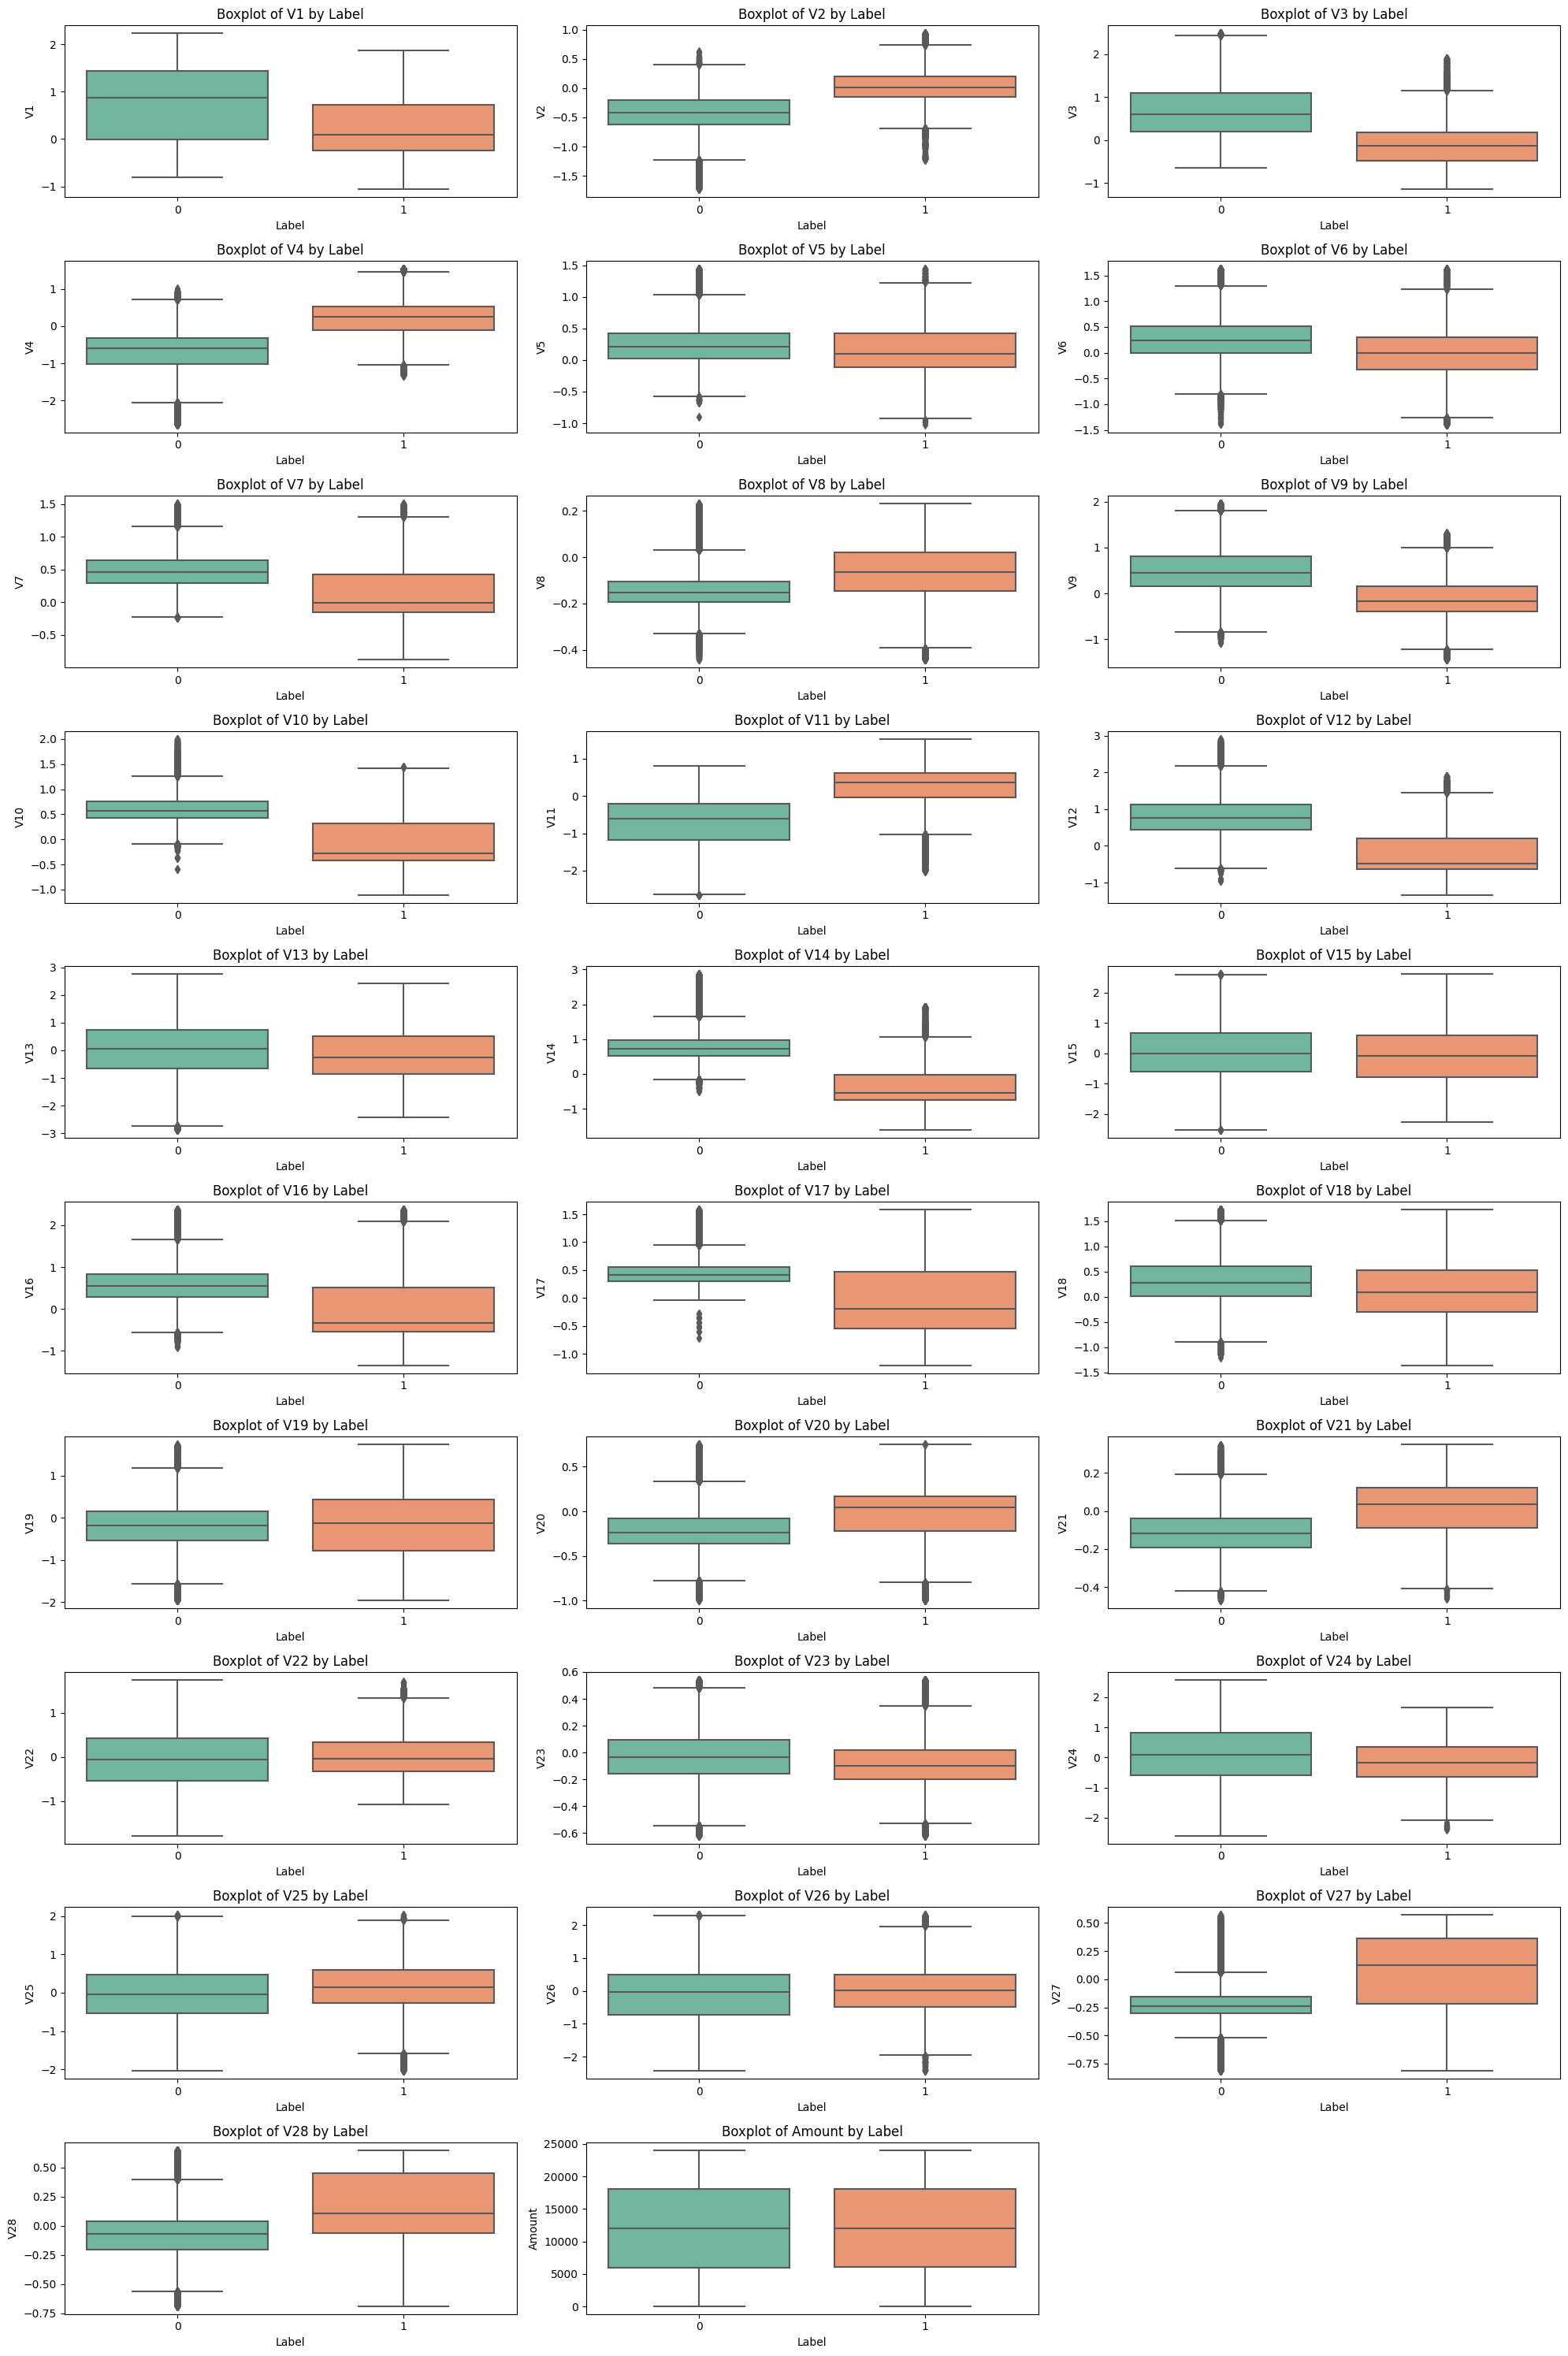

In [8]:
#Plotting the filtered dataset
#Boxplot Grouped by Label
features = df_filtered.iloc[:, 0:29] 
plt.figure(figsize=(20, 30))
for idx, col in enumerate(features):
    plt.subplot(10, 3, idx + 1)
    sns.boxplot(data=df_filtered, x='Class', y=col, palette='Set2')
    plt.title(f'Boxplot of {col} by Label', fontsize=12)
    plt.xlabel('Label')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

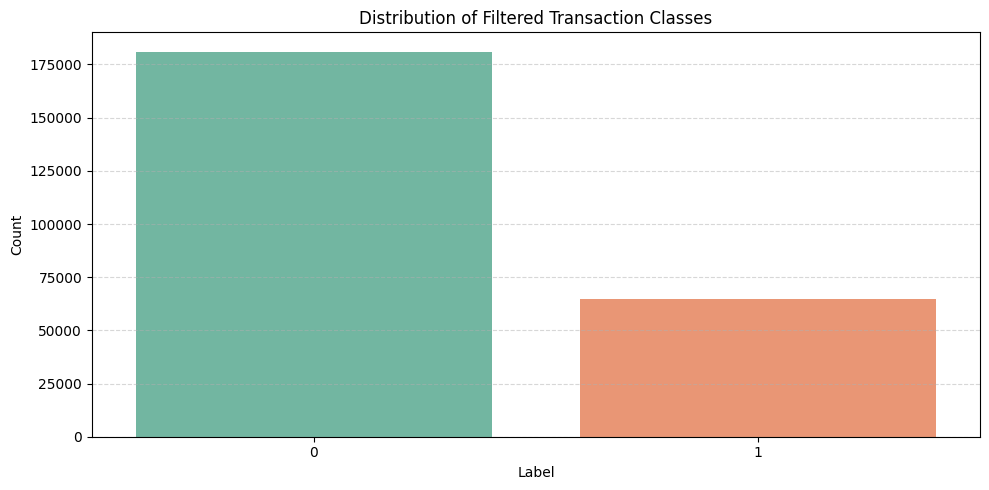

In [9]:
# Count the labels
counts = df_filtered['Class'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=counts.index, y=counts.values, palette='Set2')
plt.title('Distribution of Filtered Transaction Classes')
plt.xlabel('Label')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

*Observation: The target class is imbalanced after filteration*

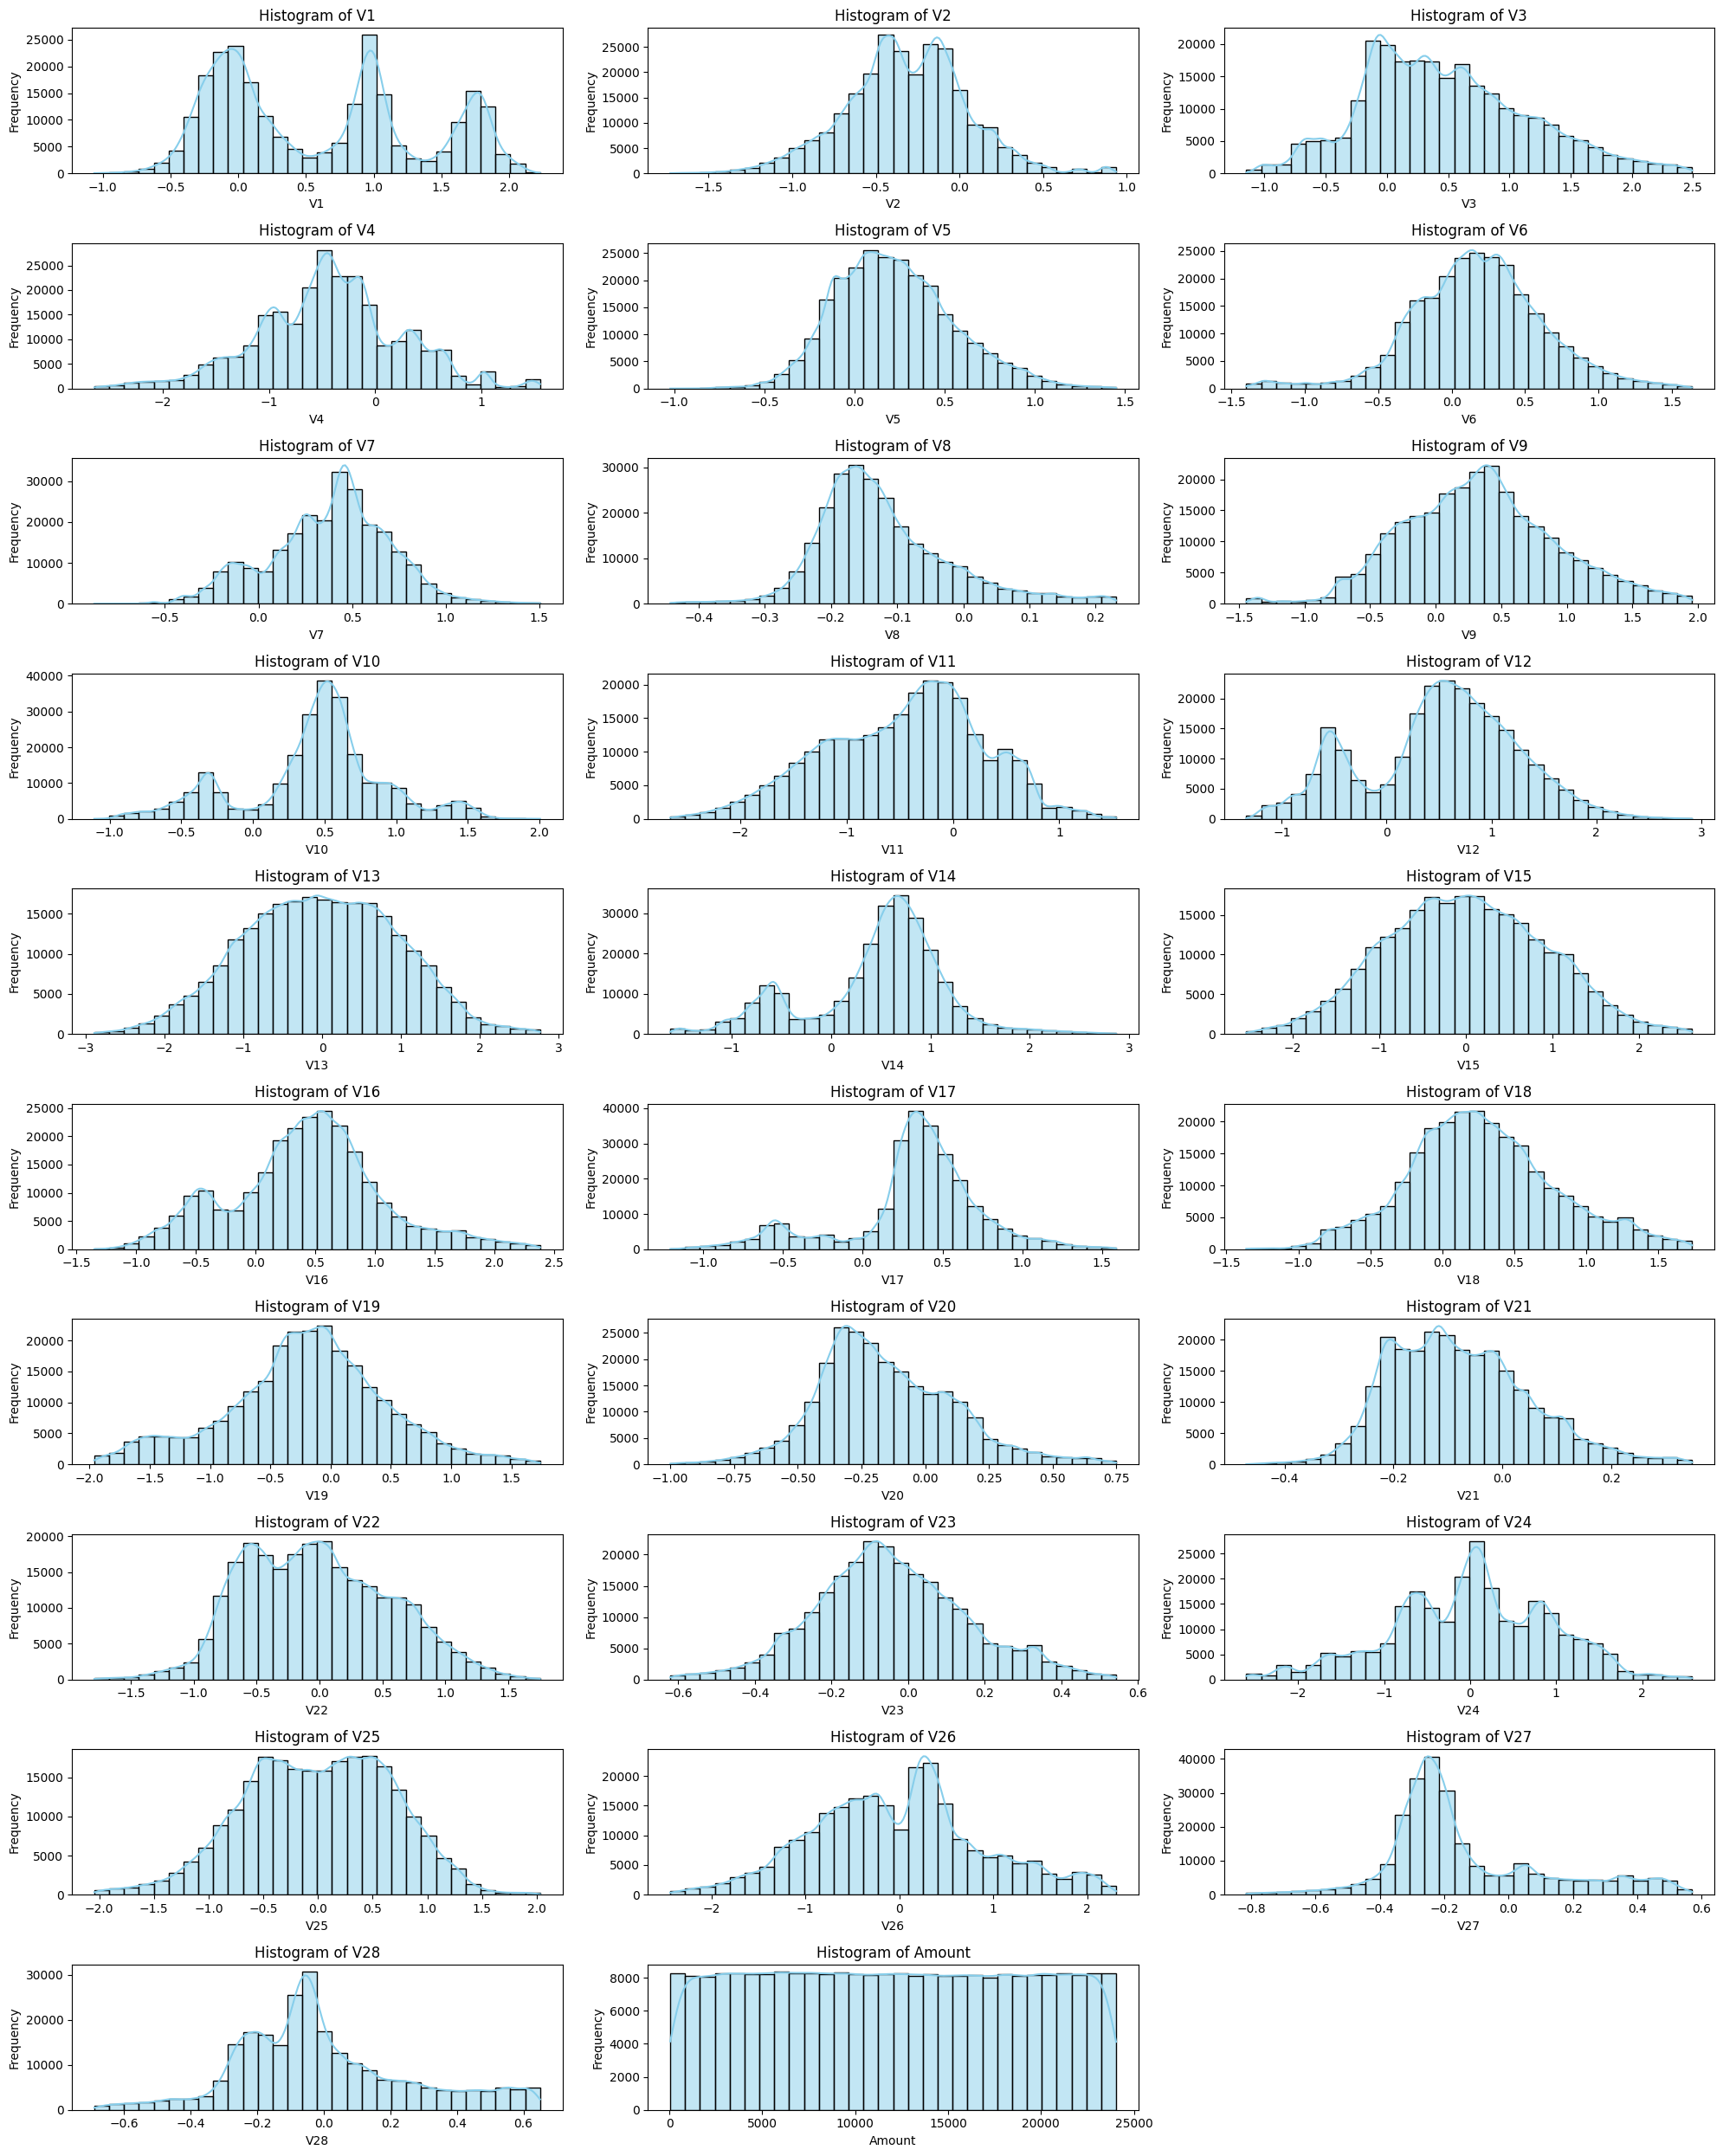

In [16]:
# Histogram plot for the continous features in the dataset
plt.figure(figsize=(20, 25))
for idx, col in enumerate(features):
    plt.subplot(10, 3, idx + 1)
    sns.histplot(data=df_filtered, x=col, bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [10]:
#Summary statistics of the filtered data
features.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,245934.000000,245934.000000,245934.000000,245934.000000,245934.000000,245934.000000,245934.000000,245934.000000,245934.000000,245934.000000,...,245934.000000,245934.000000,245934.000000,245934.000000,245934.000000,245934.000000,245934.000000,245934.000000,245934.000000,245934.000000
mean,0.602126,-0.317880,0.481631,-0.436965,0.222832,0.178685,0.380623,-0.120726,0.339166,0.433997,...,-0.154886,-0.076892,-0.018293,-0.043270,0.009276,0.002805,-0.018198,-0.134103,-0.003689,12031.490327
std,0.744775,0.363253,0.678335,0.680309,0.330213,0.452579,0.319954,0.101485,0.578584,0.495638,...,0.267879,0.128221,0.576960,0.199085,0.921207,0.669003,0.906506,0.251629,0.262580,6925.576578
min,-1.062662,-1.729058,-1.149184,-2.644870,-1.021900,-1.396762,-0.876981,-0.442967,-1.444125,-1.108105,...,-0.999860,-0.470284,-1.789980,-0.620750,-2.601296,-2.044497,-2.437186,-0.815243,-0.689718,50.280000
25%,-0.065042,-0.539878,-0.022098,-0.879892,-0.014148,-0.100318,0.188524,-0.186777,-0.065116,0.255309,...,-0.335925,-0.174505,-0.477158,-0.174309,-0.606505,-0.485398,-0.652931,-0.284164,-0.178431,6045.010000
50%,0.498273,-0.321012,0.395388,-0.433001,0.194393,0.175756,0.418349,-0.140022,0.326254,0.494590,...,-0.191995,-0.090684,-0.054001,-0.056308,0.038048,0.022058,-0.026824,-0.214238,-0.047363,12001.760000
75%,1.083831,-0.086771,0.911293,-0.056143,0.426481,0.451055,0.591047,-0.071122,0.699839,0.680019,...,0.018118,0.002590,0.395618,0.080844,0.697101,0.510711,0.483737,-0.012104,0.129567,18045.415000
max,2.229046,0.936754,2.491914,1.551548,1.449924,1.635190,1.504272,0.230917,1.954662,2.004028,...,0.748918,0.348673,1.753280,0.542558,2.579348,2.029941,2.307656,0.570631,0.649801,24039.930000


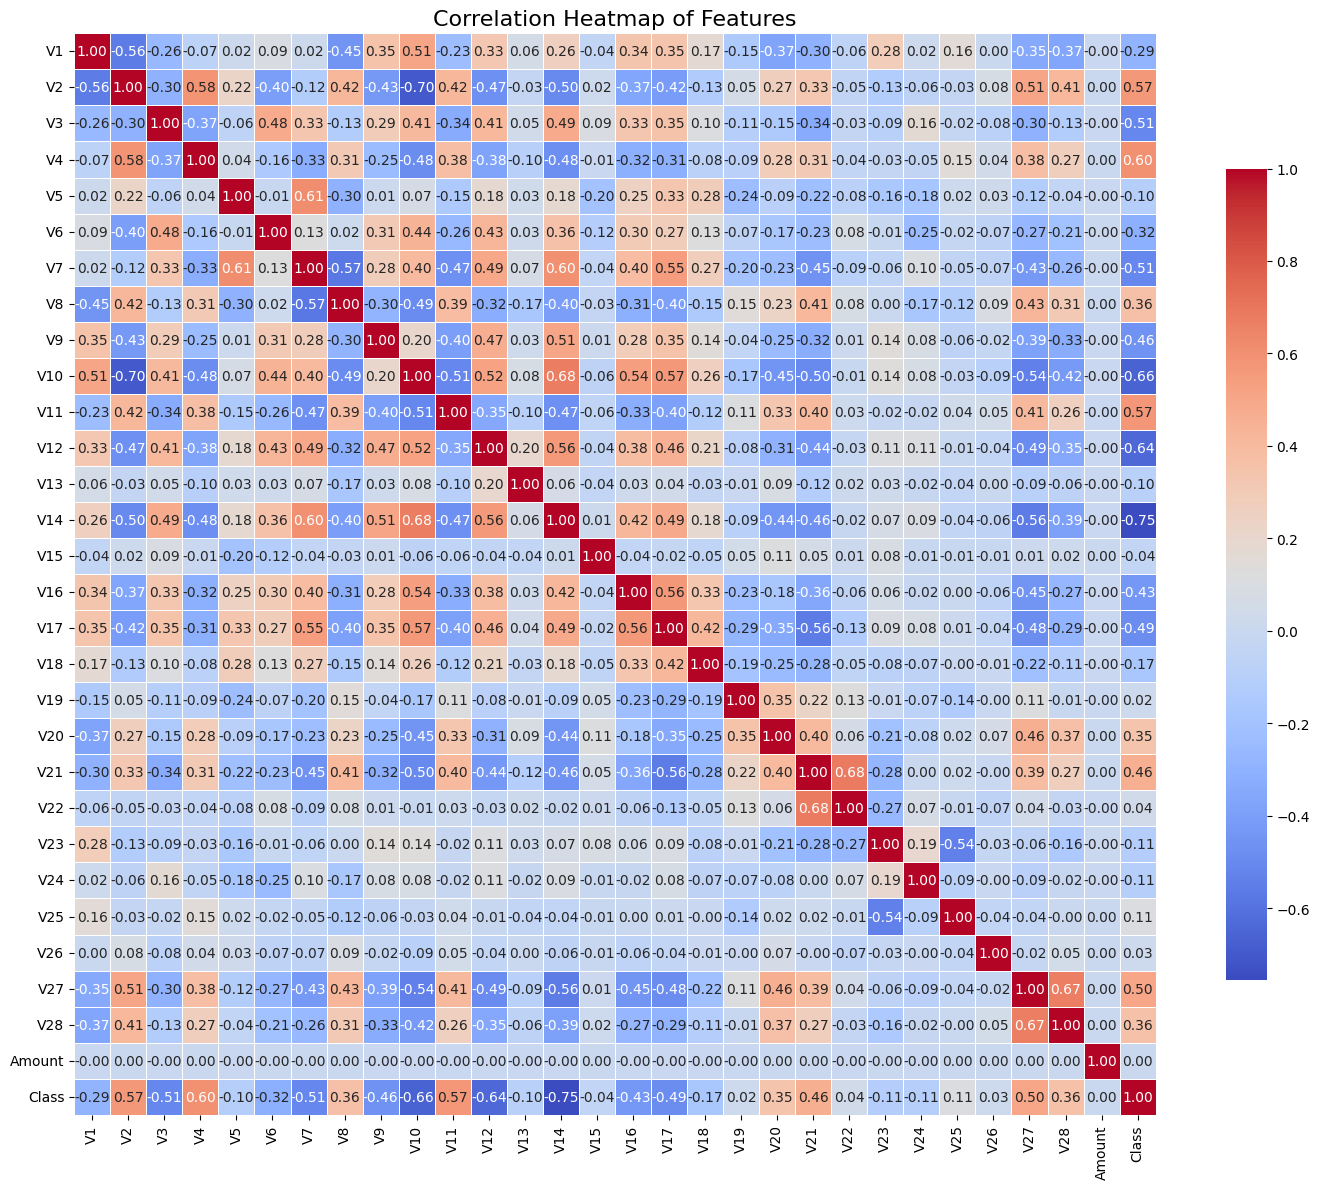

In [11]:
corr = df_filtered.corr()
# Set up the figure
plt.figure(figsize=(15, 12))
sns.heatmap(corr, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": .75})
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.tight_layout()
plt.show()

*BALANCING THE TARGET DATA USING SMOTE*

In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [13]:
X = features
y = df_filtered["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

In [14]:
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Fit SMOTE on X_train and y_train
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

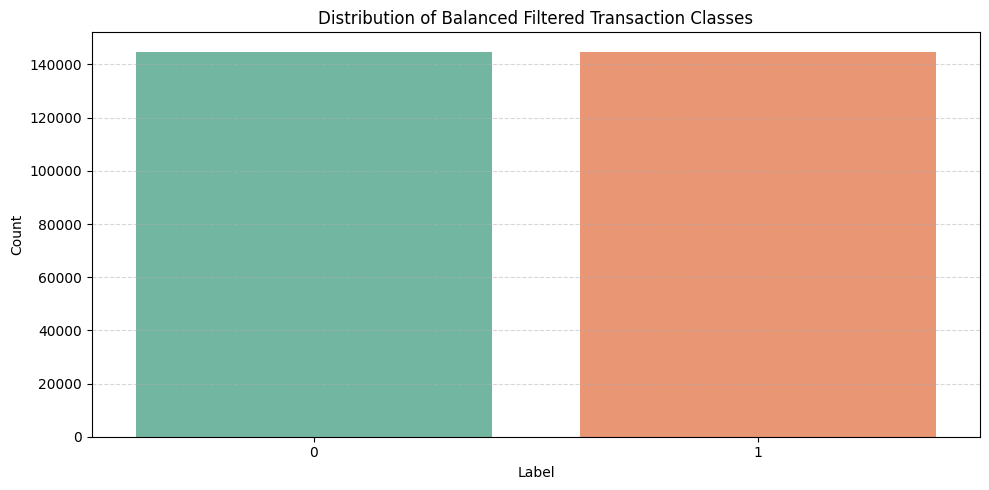

In [15]:
counts = y_train_balanced.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=counts.index, y=counts.values, palette='Set2')
plt.title('Distribution of Balanced Filtered Transaction Classes')
plt.xlabel('Label')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

*FEATURE SELECTION*

In [16]:
#Dependecies
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [17]:
# Scale features (required for Chi-square test)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [18]:
k = 20  # Number of features you want to select
chi2_selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = chi2_selector.fit_transform(X_train_scaled, y_train_balanced)
X_test_selected = chi2_selector.transform(X_test_scaled)

In [19]:
selected_indices = chi2_selector.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_indices]
print("Selected Features:", selected_feature_names)

Selected Features: ['V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V20', 'V21', 'V23', 'V27', 'V28']


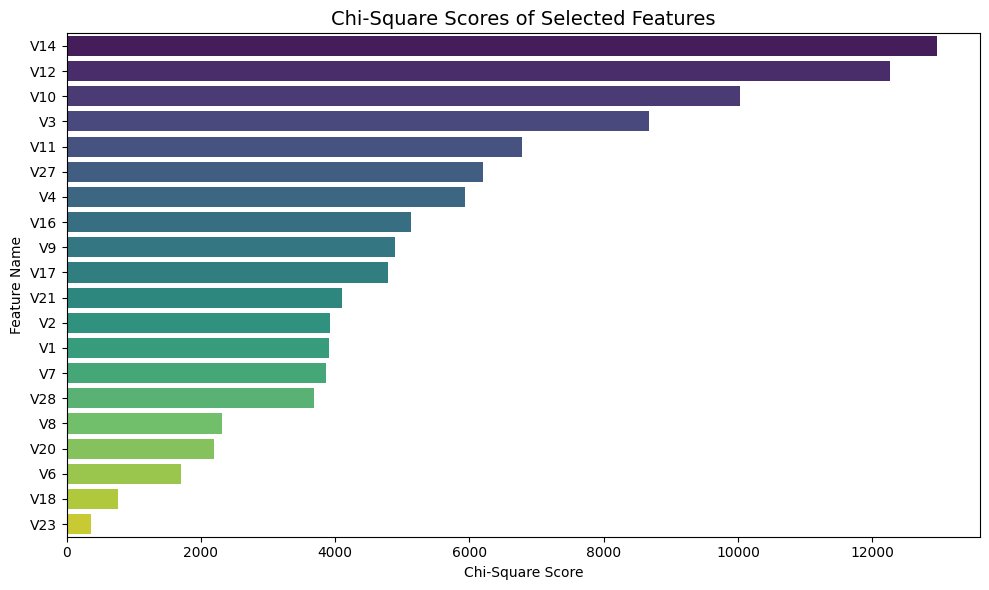

In [20]:
chi2_scores = chi2_selector.scores_
feature_scores = pd.Series(chi2_scores, index=X.columns)
selected_scores = feature_scores.iloc[selected_indices]
selected_scores = selected_scores.sort_values(ascending=False)
# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_scores.values, y=selected_scores.index, palette='viridis')
plt.title('Chi-Square Scores of Selected Features', fontsize=14)
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

In [21]:
#Dependencies
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
#Define the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1]
}
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=10,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)
# Fit on the selected training set
grid_search.fit(X_train_selected, y_train_balanced)
# Get best estimator
best_xg_model = grid_search.best_estimator_

Fitting 10 folds for each of 27 candidates, totalling 270 fits


In [24]:
print("Best Parameters for the Xgboost model:", grid_search.best_params_)

Best Parameters for the Xgboost model: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [25]:
#Evaluate on test data
y_pred_xg = best_xg_model.predict(X_test_selected)

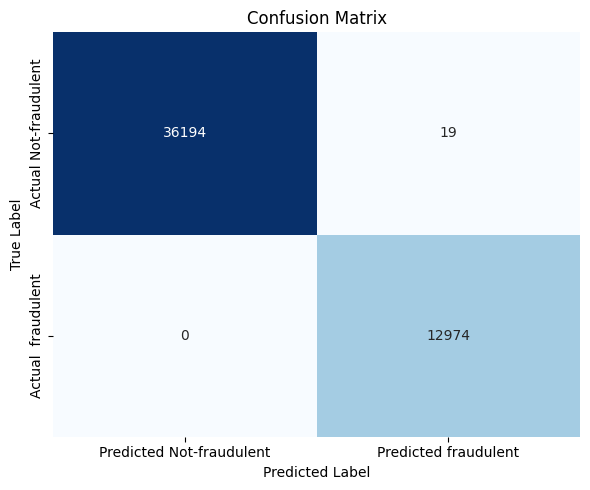

In [26]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xg)
# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not-fraudulent', 'Predicted fraudulent'],
            yticklabels=['Actual Not-fraudulent', 'Actual  fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [28]:
#Classification report 
print("\nClassification Report XGB model:\n", classification_report(y_test, y_pred_xg))


Classification Report XGB model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36213
           1       1.00      1.00      1.00     12974

    accuracy                           1.00     49187
   macro avg       1.00      1.00      1.00     49187
weighted avg       1.00      1.00      1.00     49187



*Random Forest classifier*

In [ ]:
print("Best Parameters for the Random Forest Classifier model:", grid_search.best_params_)

In [ ]:
#Evaluate on test data
y_pred_rf = best_rf_model.predict(X_test_selected)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not-fraudulent', 'Predicted fraudulent'],
            yticklabels=['Actual Not-fraudulent', 'Actual  fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
#Classification report 
print("\nClassification Report for the RF model:\n", classification_report(y_test, y_pred_rf))